### 손글씨 데이터 인식 모델 만들기
- 데이터 출처 : AI_HUB
- 사용 모델 : 최종 목표는 SWIN TRANSFORMER / 1차로 Resnet 사용해볼 예정
- 라벨 데이터: json에서 읽어올 예정

In [1]:
# 모듈 로딩
import pandas as pd
from PIL import Image

import os
import json

In [2]:
# json 파일 찾기
path = './data/labels/'
grades = os.listdir(path)
for grade in grades:
    files = os.listdir(path+grade)
    for file in files:
        print(file)

EDU_E1_032060.json
EDU_E1_032061.json
EDU_E1_032062.json
EDU_E1_032063.json
EDU_E1_032064.json
EDU_E1_032065.json
EDU_E1_032066.json
EDU_E1_032067.json
EDU_E1_032068.json
EDU_E1_032069.json
EDU_E1_032070.json
EDU_E1_032071.json
EDU_E1_032072.json
EDU_E1_032073.json
EDU_E1_032074.json
EDU_E1_032075.json
EDU_E1_032076.json
EDU_E1_032077.json
EDU_E1_032078.json
EDU_E1_032079.json
EDU_E1_032080.json
EDU_E1_032081.json
EDU_E1_032082.json
EDU_E1_032083.json
EDU_E1_032084.json
EDU_E1_032085.json
EDU_E1_032086.json
EDU_E1_032087.json
EDU_E1_032088.json
EDU_E1_032089.json
EDU_E1_032090.json
EDU_E1_032091.json
EDU_E1_032092.json
EDU_E1_032093.json
EDU_E1_032094.json
EDU_E1_032095.json
EDU_E1_032096.json
EDU_E1_032097.json
EDU_E1_032098.json
EDU_E1_032099.json
EDU_E1_032100.json
EDU_E1_032101.json
EDU_E1_032102.json
EDU_E1_032103.json
EDU_E1_032104.json
EDU_E1_032105.json
EDU_E1_032106.json
EDU_E1_032107.json
EDU_E1_032108.json
EDU_E1_032109.json
EDU_E1_032110.json
EDU_E1_032111.json
EDU_E1_03211

### json 파일 형태
![스크린샷 2024-10-26 185629-1.png](<attachment:스크린샷 2024-10-26 185629-1.png>) ![스크린샷 2024-10-26 185629.png](<attachment:스크린샷 2024-10-26 185629.png>) 
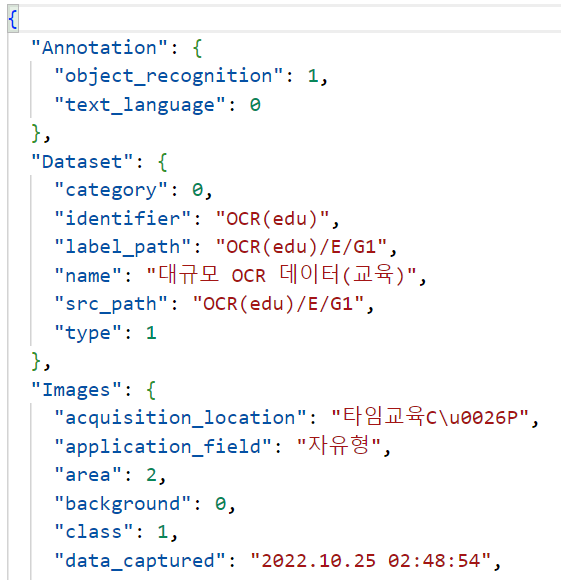
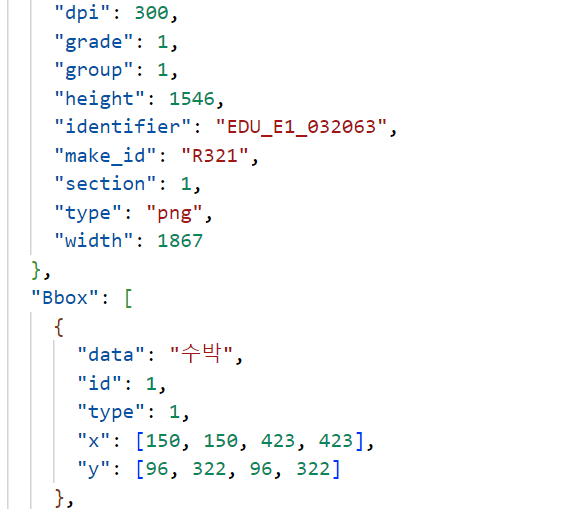

In [3]:
file = r'C:\Users\kdp\Desktop\개인프로젝트\data\labels\E1\EDU_E1_032060.json'
df_list = []
with open(file,'r') as f:
    data = json.load(f)
    # 파일명, 파일의 x,y좌표값, 손글씨 라벨 리스트에 담기 => 데이터 프레임에 추가
    file_name = data["Images"]["identifier"]
    data_num = len(data["Bbox"])
    info = data["Bbox"]
    for i in range(data_num):
        data_list = []
        label = info[i]['data']
        x_start = info[i]['x'][0]
        y_start = info[i]['y'][0]
        x_end = info[i]['x'][-1]
        y_end = info[i]['y'][-1]

        data_list.append(file_name)
        data_list.append(label)
        data_list.append(x_start)
        data_list.append(y_start)
        data_list.append(x_end)
        data_list.append(y_end)
        
        df_list.append(data_list)
print(df_list)

[['EDU_E1_032060', '가자', 15, 44, 78, 75], ['EDU_E1_032060', '가자', 17, 83, 79, 113], ['EDU_E1_032060', '가자', 21, 118, 81, 151], ['EDU_E1_032060', '가자', 21, 156, 86, 187], ['EDU_E1_032060', '나라', 97, 7, 163, 38], ['EDU_E1_032060', '나라', 99, 44, 165, 75], ['EDU_E1_032060', '나라', 103, 80, 167, 112], ['EDU_E1_032060', '나라', 105, 117, 173, 151], ['EDU_E1_032060', '나라', 109, 154, 177, 189], ['EDU_E1_032060', '노래', 182, 9, 247, 40], ['EDU_E1_032060', '노래', 186, 46, 249, 78], ['EDU_E1_032060', '노래', 189, 84, 255, 114], ['EDU_E1_032060', '노래', 195, 121, 258, 154], ['EDU_E1_032060', '노래', 198, 160, 263, 191], ['EDU_E1_032060', '다리', 271, 9, 332, 42], ['EDU_E1_032060', '다리', 274, 48, 336, 83], ['EDU_E1_032060', '다리', 280, 84, 341, 117], ['EDU_E1_032060', '다리', 281, 118, 347, 157], ['EDU_E1_032060', '다리', 290, 160, 351, 194]]


In [4]:
# 파일 정보를 읽어서 데이터프레임 생성
df_list = []
path = './data/labels/'
grades = os.listdir(path)
for grade in grades:
    files = os.listdir(path+grade)
    for file in files:
        with open(path+grade+'/'+file,'r') as f:
            data = json.load(f)
            # 파일명, 파일의 x,y좌표값, 손글씨 라벨 리스트에 담기 => 데이터 프레임에 추가
            file_name = data["Images"]["identifier"]
            file_type = data["Images"]["type"]
            data_num = len(data["Bbox"])
            info = data["Bbox"]
            for i in range(data_num):
                data_list = []
                label = info[i]['data']
                x_start = info[i]['x'][0]
                y_start = info[i]['y'][0]
                x_end = info[i]['x'][-1]
                y_end = info[i]['y'][-1]

                data_list.append(grade+'/'+file_name+'.'+file_type)
                data_list.append(label)
                data_list.append(x_start)
                data_list.append(y_start)
                data_list.append(x_end)
                data_list.append(y_end)
                
                df_list.append(data_list)

In [5]:
dataDF = pd.DataFrame(df_list, columns=['file_name', 'label', 'x_start','y_start', 'x_end', 'y_end'])

In [6]:
dataDF

,file_name,label,x_start,y_start,x_end,y_end
0,E1/EDU_E1_032060.png,가자,15,44,78,75
1,E1/EDU_E1_032060.png,가자,17,83,79,113
2,E1/EDU_E1_032060.png,가자,21,118,81,151
3,E1/EDU_E1_032060.png,가자,21,156,86,187
4,E1/EDU_E1_032060.png,나라,97,7,163,38
...,...,...,...,...,...,...
366233,M3/SCH_M3_010692.png,\angle CDA,436,498,614,592
366234,M3/SCH_M3_010692.png,(\angle BAD,204,601,442,693
366235,M3/SCH_M3_010692.png,=,441,621,482,677
366236,M3/SCH_M3_010692.png,\angle DCB),479,595,669,678


In [7]:
# dataDF.to_csv('handwrite_info.csv', index=False)

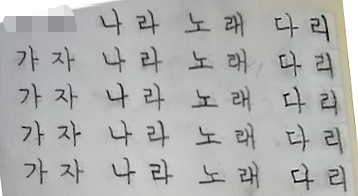

In [8]:
# 이미지 잘라서 저장하기
file_path = './data/images/'
img_path = file_path+dataDF['file_name'][0]
img = Image.open(img_path)
img

In [9]:
crop_img = img.crop(tuple(dataDF.iloc[0])[-4:])
crop_img

In [10]:
# 크롭 이미지 저장하기
#crop_img.save(f"./crop_image/{dataDF['label'][0]}_{len(dataDF)}"+'.png')

In [11]:
# 전체 이미지 크롭 후 저장하기
# folder_path = './data/images/'
# for i in range(len(dataDF)):
#     img_path = folder_path+'/'+dataDF['file_name'][i]
#     img = Image.open(img_path)
#     crop_img = img.crop(tuple(dataDF.iloc[i])[-4:])
#     crop_img.save(f"./crop_image/{i}_{dataDF['label'][i]}"+'.png')

##### ERROR 발생 : SystemError: tile cannot extend outside image => 이미지 픽셀 라벨링이 잘못 되어 있음 => 해당 데이터 삭제하기
![스크린샷 2024-10-26 211618.png](<attachment:스크린샷 2024-10-26 211618.png>)  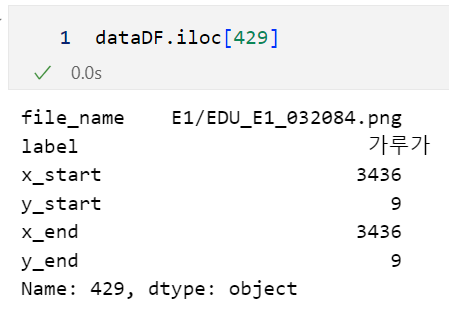
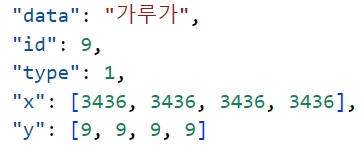

In [12]:
dataDF = dataDF.drop([429],axis=0).reset_index(drop=True)
dataDF

,file_name,label,x_start,y_start,x_end,y_end
0,E1/EDU_E1_032060.png,가자,15,44,78,75
1,E1/EDU_E1_032060.png,가자,17,83,79,113
2,E1/EDU_E1_032060.png,가자,21,118,81,151
3,E1/EDU_E1_032060.png,가자,21,156,86,187
4,E1/EDU_E1_032060.png,나라,97,7,163,38
...,...,...,...,...,...,...
366232,M3/SCH_M3_010692.png,\angle CDA,436,498,614,592
366233,M3/SCH_M3_010692.png,(\angle BAD,204,601,442,693
366234,M3/SCH_M3_010692.png,=,441,621,482,677
366235,M3/SCH_M3_010692.png,\angle DCB),479,595,669,678


In [13]:
# folder_path = './data/images/'
# for i in range(len(dataDF)):
#     img_path = folder_path+'/'+dataDF['file_name'][i]
#     img = Image.open(img_path)
#     crop_img = img.crop(tuple(dataDF.iloc[i])[-4:])
#     crop_img.save(f"./crop_image/{i}_{dataDF['label'][i]}"+'.png')

##### ERROR 발생 : [Errno 22] Invalid argument : 파일 이름으로 설정할 수 없는 문자가 포함되어 있음 (\\, /, :, *, ?, ", <, >, | ) 
##### => 라벨명이 아니라 인덱스를 이름으로 저장하기
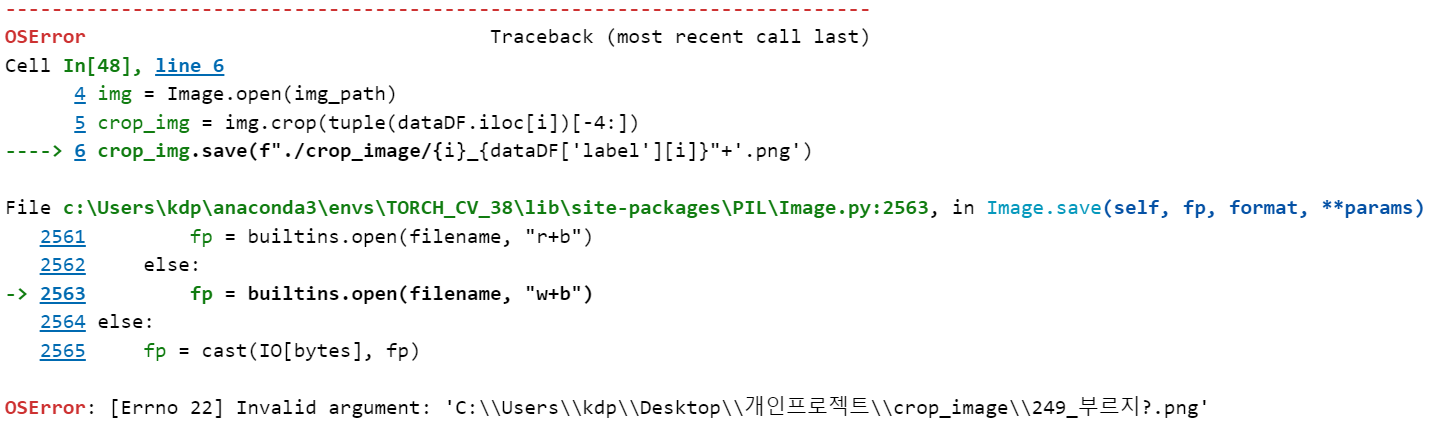

In [14]:
# folder_path = './data/images/'
# for i in range(len(dataDF)):
#     img_path = folder_path+'/'+dataDF['file_name'][i]
#     img = Image.open(img_path)
#     crop_img = img.crop(tuple(dataDF.iloc[i])[-4:])
#     crop_img.save(f"./crop_image/{i}"+'.png')

In [15]:
# 픽셀 위치가 동일한 행이 더 존재해서 오류 발생 => 이러한 행을 모두 찾기 위해서 조건문 설정
dataDF[(dataDF['x_end']==dataDF['x_start']) | (dataDF['y_end']==dataDF['y_start'])]

,file_name,label,x_start,y_start,x_end,y_end
267966,M1/SCH_M1_003063.png,사람들에게,2209,389,2209,389


In [16]:
# 해당 행 다시 삭제
dataDF = dataDF.drop([267966],axis=0).reset_index(drop=True)
dataDF

,file_name,label,x_start,y_start,x_end,y_end
0,E1/EDU_E1_032060.png,가자,15,44,78,75
1,E1/EDU_E1_032060.png,가자,17,83,79,113
2,E1/EDU_E1_032060.png,가자,21,118,81,151
3,E1/EDU_E1_032060.png,가자,21,156,86,187
4,E1/EDU_E1_032060.png,나라,97,7,163,38
...,...,...,...,...,...,...
366231,M3/SCH_M3_010692.png,\angle CDA,436,498,614,592
366232,M3/SCH_M3_010692.png,(\angle BAD,204,601,442,693
366233,M3/SCH_M3_010692.png,=,441,621,482,677
366234,M3/SCH_M3_010692.png,\angle DCB),479,595,669,678


In [17]:
# 라벨의 고유값과 각 값의 빈도수 출력
len(dataDF['label'].unique()), dataDF['label'].value_counts()

(110295,
 label
 =              3450
 \rightarrow    2827
 +              1560
 수              1541
 -              1109
                ... 
 1빠                1
 광혜원               1
 서양식병원             1
 (경인선              1
 \angle DCB)       1
 Name: count, Length: 110295, dtype: int64)

In [18]:
dataDF.iloc[267966:]

,file_name,label,x_start,y_start,x_end,y_end
267966,M1/SCH_M1_003064.png,중간중간,253,177,418,250
267967,M1/SCH_M1_003064.png,정리하는,436,176,606,245
267968,M1/SCH_M1_003064.png,게,615,184,682,239
267969,M1/SCH_M1_003064.png,조금,716,178,802,248
267970,M1/SCH_M1_003064.png,힘들었지만,828,180,1062,256
...,...,...,...,...,...,...
366231,M3/SCH_M3_010692.png,\angle CDA,436,498,614,592
366232,M3/SCH_M3_010692.png,(\angle BAD,204,601,442,693
366233,M3/SCH_M3_010692.png,=,441,621,482,677
366234,M3/SCH_M3_010692.png,\angle DCB),479,595,669,678


In [20]:
# 오류 발생 지점 이후 부터 다시 저장
# folder_path = './data/images/'
# for i in range(267966,len(dataDF)):
#     img_path = folder_path+'/'+dataDF['file_name'][i]
#     img = Image.open(img_path)
#     crop_img = img.crop(tuple(dataDF.iloc[i])[-4:])
#     crop_img.save(f"./crop_image/{i}"+'.png')

In [21]:
dataDF.to_csv('handwrite_final.csv', index=False)